In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from snowball_backtest import snowball_backtest

### 中证500雪球产品历史收益回测
回测自2006年至今，每日滚动投资一个一年期的雪球合约，对每张合约的盈亏进行统计。

In [2]:
zz500 = pd.read_excel("000905.xlsx", index_col=0)
backtest_result = snowball_backtest(price_series=zz500,
                                    window=240,
                                    step=1)

<AxesSubplot:>

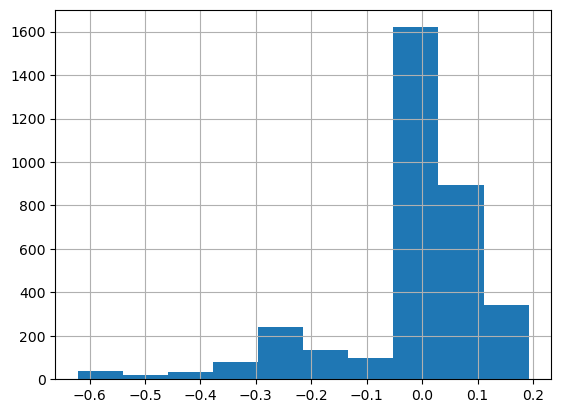

In [3]:
profit = backtest_result["Profit"] / 1000000
profit.hist()

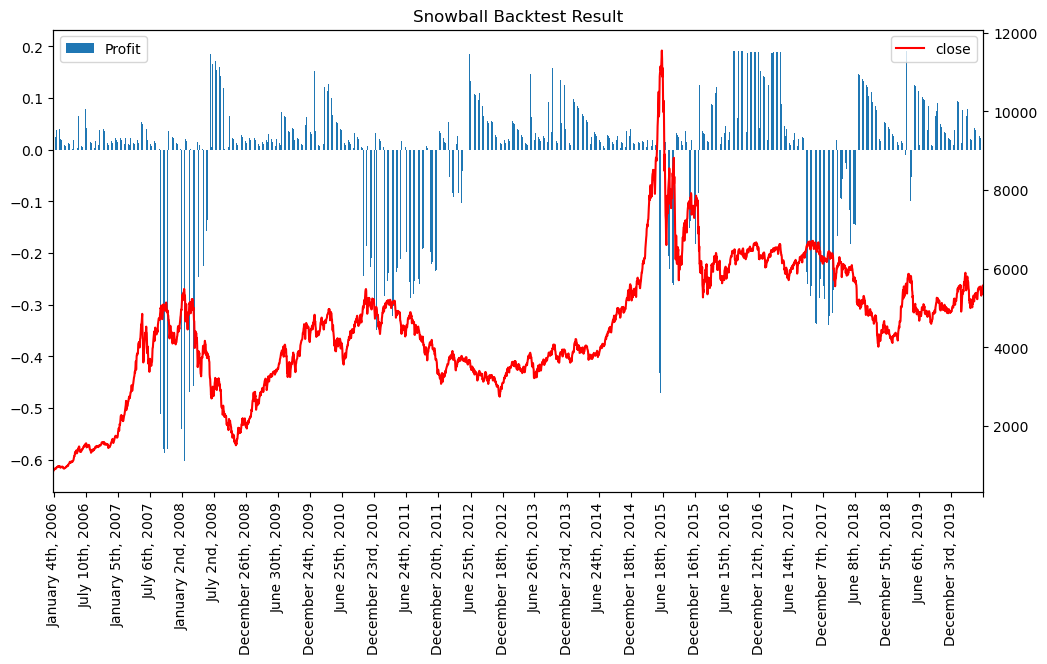

In [49]:
res = pd.merge(zz500, profit, "inner", left_index=True, right_index=True)
plt.figure(figsize=(12, 6))
ax = plt.gca()
res["Profit"].plot(kind="bar", ax=ax)
plt.legend(["Profit"])
ax1 = ax.twinx()
res["close"].plot(ax=ax1, color="red")
plt.legend(["close"])
plt.title("Snowball Backtest Result")
plt.xticks(np.linspace(0, len(profit), 30).round())
plt.show()

In [6]:
profit.describe()

count    3504.000000
mean       -0.010612
std         0.135731
min        -0.621221
25%         0.005475
50%         0.018578
75%         0.045711
max         0.192025
Name: Profit, dtype: float64

In [9]:
knock_out = backtest_result["KO Date"]
knock_in = backtest_result["KI Date"]
ko_ratio = knock_out.count() / knock_out.shape[0]
ki_ratio = knock_in.count() / knock_in.shape[0]
none_kiko_ratio = 1 - ko_ratio - ki_ratio
print(f"敲出比率{ko_ratio:.2%}")
print(f"敲入未敲出比率{ki_ratio:.2%}")
print(f"未敲入未敲出比率{none_kiko_ratio:.2%}")

敲出比率76.74%
敲入未敲出比率20.26%
未敲入未敲出比率3.00%
